In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications import VGG19
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [0]:
path = 'gdrive/My Drive/music_classification/img_data_mel4'
img = Image.open(path+'/train/blues/blues.00000.png')

In [9]:
img.size

(669, 217)

In [0]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(669, 217, 3))

In [11]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 669, 217, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 669, 217, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 669, 217, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 334, 108, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 334, 108, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 334, 108, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 167, 54, 128)      0     

In [12]:
conv_base.trainable = False
'''set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False'''

"set_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block5_conv1':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False"

In [141]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(path+'/train', target_size = (669, 217), batch_size=40, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(path+'/train', target_size = (669, 217), batch_size=40, class_mode='categorical', subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(path+'/test', target_size = (669, 217), batch_size=40, class_mode='categorical')

Found 640 images belonging to 10 classes.
Found 160 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [0]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
#model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
history = model.fit_generator(train_generator, steps_per_epoch=16, epochs=50, validation_data=val_generator, validation_steps=4, verbose=2,
                              callbacks=[ModelCheckpoint(path+'best_model.hdf5', monitor='val_acc', save_best_only=True), 
                                         ModelCheckpoint(path+'best_model_loss.hdf5', monitor='val_loss', save_best_only=True)])

Epoch 1/50
 - 18s - loss: 2.2857 - acc: 0.1266 - val_loss: 2.0917 - val_acc: 0.2438
Epoch 2/50
 - 15s - loss: 1.9772 - acc: 0.3016 - val_loss: 1.9018 - val_acc: 0.3562
Epoch 3/50
 - 15s - loss: 1.7986 - acc: 0.3562 - val_loss: 1.7171 - val_acc: 0.4688
Epoch 4/50
 - 15s - loss: 1.6171 - acc: 0.4141 - val_loss: 1.6201 - val_acc: 0.4688
Epoch 5/50
 - 15s - loss: 1.4961 - acc: 0.4937 - val_loss: 1.5829 - val_acc: 0.4750
Epoch 6/50
 - 15s - loss: 1.3787 - acc: 0.5484 - val_loss: 1.5564 - val_acc: 0.4563
Epoch 7/50
 - 15s - loss: 1.3166 - acc: 0.5484 - val_loss: 1.4793 - val_acc: 0.4562
Epoch 8/50
 - 15s - loss: 1.2376 - acc: 0.5797 - val_loss: 1.3714 - val_acc: 0.5500
Epoch 9/50
 - 15s - loss: 1.1507 - acc: 0.6156 - val_loss: 1.4655 - val_acc: 0.4813
Epoch 10/50
 - 15s - loss: 1.0831 - acc: 0.6297 - val_loss: 1.4208 - val_acc: 0.5250
Epoch 11/50
 - 15s - loss: 1.0754 - acc: 0.6438 - val_loss: 1.4010 - val_acc: 0.5000
Epoch 12/50
 - 15s - loss: 1.0412 - acc: 0.6547 - val_loss: 1.3423 - val_a

In [144]:
model.evaluate_generator(test_generator)

[1.1139780282974243, 0.6549999952316284]

In [0]:
model.save_weights(path+'best_model_end.hdf5')

In [0]:
model.load_weights(path+'best_model.hdf5')

In [153]:
model.evaluate_generator(test_generator)

[1.0724298000335692, 0.625]

In [0]:
model.load_weights(path+'best_model_loss.hdf5')

In [155]:
model.evaluate_generator(test_generator)

[1.0724297761917114, 0.625]

In [0]:
model.load_weights(path+'best_model_end.hdf5')

In [157]:
acc1 = model.evaluate_generator(test_generator)
print(acc1)
print(acc2)
print(acc3)

[1.1139780044555665, 0.6550000071525574]
[1.1675798773765564, 0.6299999952316284]
[1.2570952415466308, 0.6150000095367432]


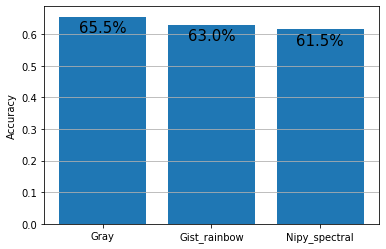

In [161]:
names = ['Gray', 'Gist_rainbow', 'Nipy_spectral']
acc = [acc1[1], acc2[1], acc3[1]]
y_pos = np.arange(3)
plt.bar(y_pos, acc)
plt.xticks(y_pos, names)
for y_v, acc_v in zip(y_pos, acc):
  plt.text(y_v, acc_v-0.05, str(np.around(acc_v*100, 2))+'%', horizontalalignment='center', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.savefig(path+'Accuracy.png')